In [7]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv("/content/drive/MyDrive/資料探勘/climate.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [17]:
 crop_yield = pd.qcut(df['hg/ha_yield'], q=5, precision=0, duplicates = 'drop')
 df.insert(7, column="crop_yield", value=crop_yield)
 df

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,crop_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613,"(28303.0, 59076.0]"
1,Albania,Potatoes,1990,1485,121.00,16.37,66667,"(59076.0, 129411.0]"
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333,"(17000.0, 28303.0]"
3,Albania,Sorghum,1990,1485,121.00,16.37,12500,"(49.0, 17000.0]"
4,Albania,Soybeans,1990,1485,121.00,16.37,7000,"(49.0, 17000.0]"
...,...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581,"(17000.0, 28303.0]"
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066,"(49.0, 17000.0]"
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142,"(49.0, 17000.0]"
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222,"(17000.0, 28303.0]"


In [16]:
df = df.drop(["crop_yield"], axis=1)
df

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613
1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,Albania,Soybeans,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222


In [9]:
print(df.crop_yield.value_counts())

(17000.0, 28303.0]      5668
(49.0, 17000.0]         5649
(129411.0, 501412.0]    5649
(59076.0, 129411.0]     5648
(28303.0, 59076.0]      5628
Name: crop_yield, dtype: int64


In [18]:
df['crop_yield'] = df['crop_yield'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
 7   crop_yield                     28242 non-null  string 
dtypes: float64(2), int64(3), object(2), string(1)
memory usage: 1.7+ MB


In [19]:
df

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,crop_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613,"(28303.0, 59076.0]"
1,Albania,Potatoes,1990,1485,121.00,16.37,66667,"(59076.0, 129411.0]"
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333,"(17000.0, 28303.0]"
3,Albania,Sorghum,1990,1485,121.00,16.37,12500,"(49.0, 17000.0]"
4,Albania,Soybeans,1990,1485,121.00,16.37,7000,"(49.0, 17000.0]"
...,...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581,"(17000.0, 28303.0]"
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066,"(49.0, 17000.0]"
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142,"(49.0, 17000.0]"
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222,"(17000.0, 28303.0]"


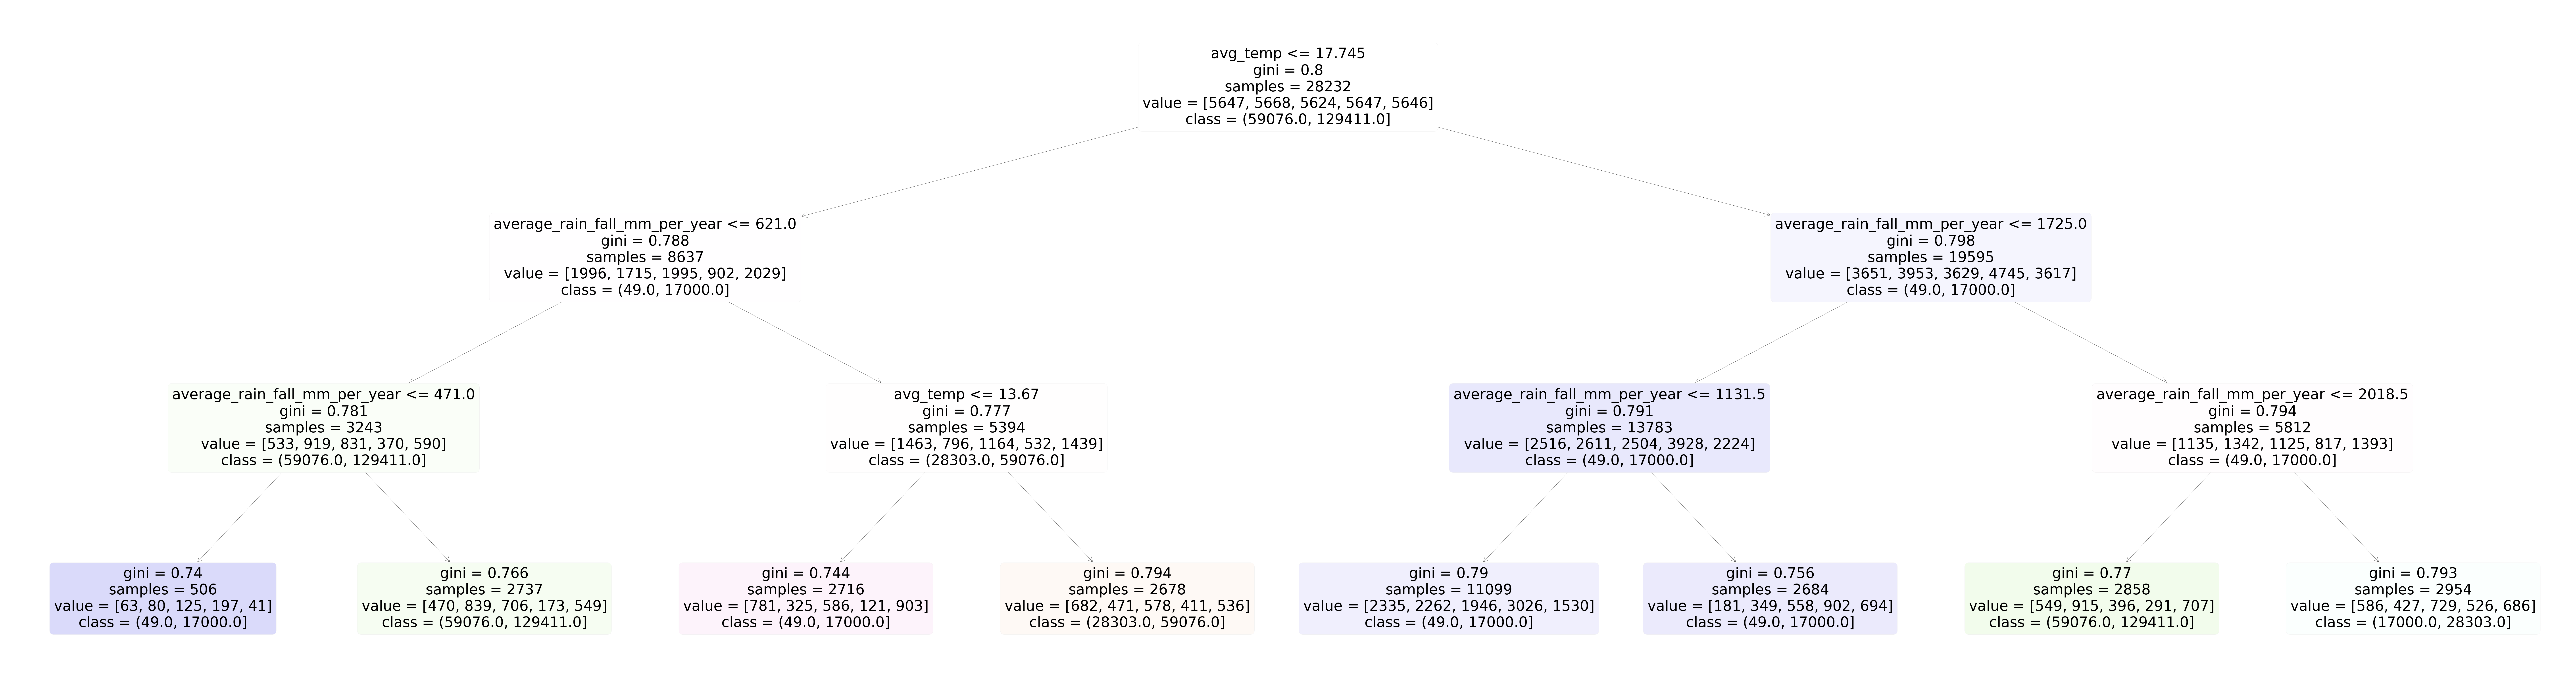

In [67]:
x=df[['average_rain_fall_mm_per_year','avg_temp']]
y=df['crop_yield']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=10,random_state=0)
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,Y_train)
model = DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(x,y)
plt.figure(figsize=(150,40))
tree.plot_tree(dtree,
        filled = True,
        rounded = True,
        class_names = df['crop_yield'],#.unique(),
        feature_names = X_train.columns);


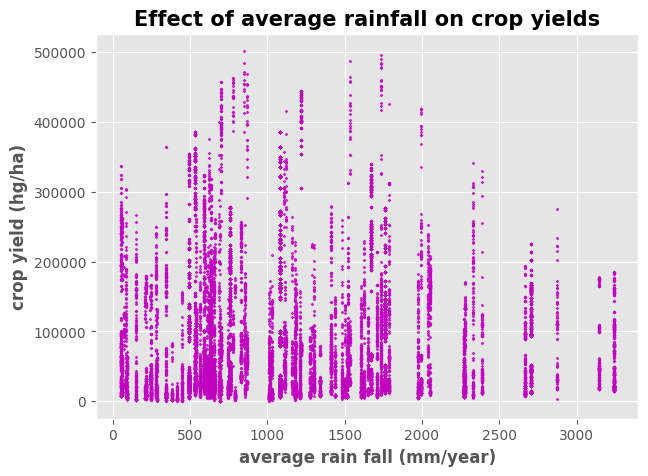

In [52]:
plt.figure(figsize=(7,5))   # 顯示圖框架大小

plt.style.use("ggplot")     # 使用ggplot主題樣式
plt.xlabel("average rain fall (mm/year)", fontweight = "bold")  #設定x座標標題及粗體
plt.ylabel("crop yield (hg/ha)", fontweight = "bold")   #設定y座標標題及粗體
plt.title("Effect of average rainfall on crop yields", fontsize = 15, fontweight = "bold")  #設定標題、字大小及粗體

plt.scatter(df["average_rain_fall_mm_per_year"],   # x軸資料
      df["hg/ha_yield"],     # y軸資料
      c = "m",         # 點顏色
      s = 2,          # 點大小
      alpha = .8,        # 透明度
      marker = "D")       # 點樣式

plt.savefig("Effect of average rainfall on crop yields.jpg")   #儲存圖檔

In [44]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()
# clf.fit(x, y)
axes=[0,7,0,3]
x1 = np.linspace(axes[0],axes[1],100)
x2 = np.linspace(axes[2],axes[3],100)
x1,x2 = np.meshgrid(x1,x2)
x_new = np.c_[x1.ravel(),x2.ravel()]
z = model.predict(x_new)
z = z.reshape(x1.shape)
# y_pred = model.predict(z)
plt.contourf(x1,x2,z,alpha=0.2)

plt.plot(x[:,0][y==0],x[:,1][y==0],'yo',label='<49 - 17000>')
plt.plot(x[:,0][y==1],x[:,1][y==1],'bs',label='<17000 - 28303>')
plt.plot(x[:,0][y==2],x[:,1][y==2],'g*',label='<28303 - 59076>')
plt.plot(x[:,0][y==3],x[:,1][y==3],'r+',label='<59076 - 129411>')
plt.plot(x[:,0][y==4],x[:,1][y==4],'mD',label='<129411 - 501412>')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


NameError: name 'contourf' is not defined